In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

In [2]:
# Load the full grocery customer dataset and take a random sample of 100 instances
data = pd.read_csv('customer_personality.csv').sample(100, random_state=123)

In [3]:
# Use StandardScaler() to standardize input features
X = data[['Fruits', 'Meats']]
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X)

In [4]:
# Apply DBSCAN with epsilon = 1 and min_samples = 10
dbscan = DBSCAN(eps=1, min_samples=10)
dbscan = dbscan.fit(X)

In [5]:
# Print the cluster labels and core point indices
print('Labels:', dbscan.labels_)
print('Core points:', dbscan.core_sample_indices_)
print('Number of core points:', len(dbscan.core_sample_indices_))


Labels: [ 0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0 -1  0  0  0  0  0 -1  0  0
  0  0  0  0  0 -1  0  0  0  0  0 -1  0  0 -1  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0 -1  0 -1  0  0  0  0  0  0 -1  0 -1 -1  0
  0  0  0  0]
Core points: [ 0  1  2  3  4  5  6  7  8 10 11 13 16 17 18 19 20 22 23 24 25 26 27 28
 30 31 32 33 34 36 37 39 40 41 42 44 45 46 47 48 49 50 51 52 53 54 55 56
 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80
 83 85 86 87 88 89 90 92 95 96 97 98 99]
Number of core points: 85


In [6]:
# Add the cluster labels to the dataset as strings
data['clusters'] = dbscan.labels_.astype(str)

# Sort by cluster label (for plotting purposes)
data.sort_values(by='clusters', inplace=True)

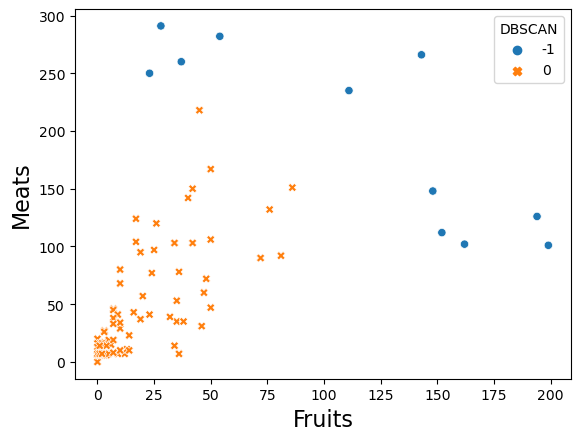

In [7]:
# Plot clusters on the original data
p = sns.scatterplot(data=data, x='Fruits',
                    y='Meats', hue='clusters',
                    style='clusters')
p.set_xlabel('Fruits', fontsize=16)
p.set_ylabel('Meats', fontsize=16)
p.legend(title='DBSCAN')

Labels: [ 0  0  0  0  0  0  0  0  0 -1  0  0 -1  0 -1 -1  0  0  0  0  0 -1  0  0
  0  0  0  0  0 -1  0  0  0  0  0 -1  0  0 -1  0  0  0  0 -1  0  0  0 -1
  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0
 -1  0  0  0  0  0  0  0  0 -1 -1  0 -1  0  0  0  0  0  0 -1  0 -1 -1  0
  0  0  0  0]
Core points: [ 0  1  3  4  5  6  7  8 10 11 13 16 17 18 19 20 22 23 24 25 26 27 28 30
 31 32 33 34 36 37 39 40 41 44 45 46 48 49 50 51 52 53 54 55 56 57 59 60
 61 62 63 64 65 66 67 68 69 70 71 73 74 75 76 77 78 79 80 83 85 86 87 88
 89 90 92 95 96 97 98 99]
Number of core points: 80


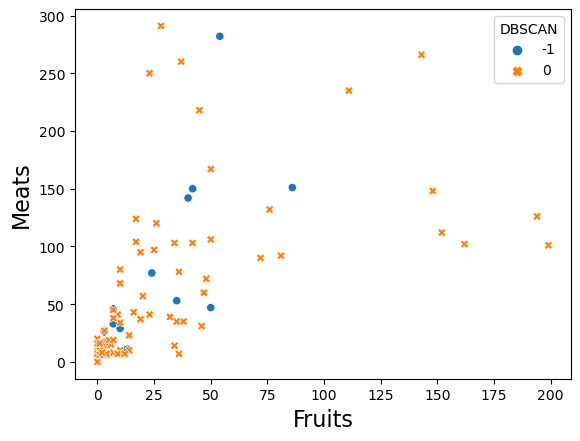

In [8]:


#Adjust epsilon and min_samples. Re-run the code and examine changes in the output.
#Increase the number of points sampled to 500. Re-run the code and examine changes in the output.
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan = dbscan.fit(X)


# Print the cluster labels and core point indices
print('Labels:', dbscan.labels_)
print('Core points:', dbscan.core_sample_indices_)
print('Number of core points:', len(dbscan.core_sample_indices_))

# Add the cluster labels to the dataset as strings
data['clusters'] = dbscan.labels_.astype(str)

# Sort by cluster label (for plotting purposes)
data.sort_values(by='clusters', inplace=True)

# Plot clusters on the original data
p = sns.scatterplot(data=data, x='Fruits',
                    y='Meats', hue='clusters',
                    style='clusters')
p.set_xlabel('Fruits', fontsize=16)
p.set_ylabel('Meats', fontsize=16)
p.legend(title='DBSCAN')